In [45]:
%pylab inline
import h5py
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import os
import mpl_toolkits.mplot3d.axes3d as axes3d
import scipy.interpolate as interpolate
masterFilename = "/Users/charlespan/Data/calibrate_012_002_master.h5"

Populating the interactive namespace from numpy and matplotlib


/Users/charlespan/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'number']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [46]:
def dispImage(img,min=0,max=1024, log=True):
    ## image plotter ##
      #plt.ion()
      #if img is None: return
      #figure = plt.figure(figsize=(16,8))
      #plt.xlim(0,1000)
      #plt.ylim(600,300)
      #if log:
          #img = np.log(img)
      #pltimg = img.astype(np.float32)
      #im = plt.imshow(pltimg,cmap=cm.nipy_spectral)
      #plt.colorbar()
      #im.set_clim(min,max)
      #plt.draw()
      #input("press enter to continue")
      
    ##this is mine
      plt.ion()
      if img is None: return
      figure = plt.figure(figsize=(16,4))
      #plt.xlim(0,1000)
      #plt.ylim(500,300)
      if log:
          img = numpy.log(img)
      pltimg = img.astype(numpy.float32)
      im = plt.imshow(pltimg,cmap=cm.hot)
      plt.colorbar()
      im.set_clim(min,max)
      plt.draw()
    
      return figure

In [47]:
class ImageReadException(Exception):
    def __init__(self, value):
        self.value = value
    def __str__(self):
        return repr(self.value)

In [48]:
def createLUT(hdf5File):
    LUT = {}
    entry = hdf5File['entry']
    
    for datalink in list(entry['data']):
        if not(datalink[0:4] == 'data'): 
            continue
        
        ### open the link ###
        try:
            data = entry['data'][datalink] 
            #print (data)
        except KeyError as exception: ### cannot open link, probably file does not exist
            continue

        
        ### read the image_nr_low and image_nr_high attributes ###
        image_nr_low  = data.attrs['image_nr_low']
        image_nr_high = data.attrs['image_nr_high']

        for imgNr in range(image_nr_low-1, image_nr_high):
            LUT[imgNr] = (datalink, imgNr-image_nr_low)
    
    return LUT

In [49]:
def readImage(imgNr, LUT, hdf5File):
    datalink = ''
    try:
        (datalink, imageNrOffset) = LUT[imgNr]
    except KeyError as e:
        raise ImageReadException('imgNr ({0}) out of range'.format(imgNr))
    
    
    data = hdf5File['entry']['data'][datalink]
    ### use slicing access to get images with image number imageNrOffset ###
    image = data[imageNrOffset, : , : ] ## z / y / x
    #print(image)
    intensitymatrix = data[-1, :, :]  ## z / y / x
    #print(image.shape)
    #print(image[590:600,450:460]) #row first, then column
    return image ## is a numpy array

In [50]:
#masterFilename = '/Users/charlespan/data/second_79_master.h5'
hdf5File = h5py.File(masterFilename, 'r')

######### NEXUS HEADER ITEMS #########

### example: list all entries in /entry/instrument/detector ###
detector = hdf5File['entry']['instrument']['detector']
#print ("entries in detector: ", list(detector))
#print (list(hdf5File['entry']))
print ((hdf5File['entry']['data']['data_000001']))
### example: get the gain settings ###
# gain_setting = detector['gain_setting']
# print "gain setting: ", gain_setting[0] ### remark: In NeXus, data is always
                                        ### stored as arrays, even if the data is scalar.

<HDF5 dataset "data": shape (1, 1065, 1030), type "<u4">


In [51]:
######### IMAGES #########

### first create the LUT to find the path to the images ###
    
LUT = createLUT(hdf5File)
imgNr = 0

image = readImage(imgNr, LUT, hdf5File)
    
### do whatever you want with the image ###
### e.g. draw the image ###
    
#if mpl:
     #dispImage(image,  max=10, log=False)

In [52]:
#masterFilename = '/Users/charlespan/data/second_79_master.h5'
hdf5File1 = h5py.File(masterFilename, 'r')
print(hdf5File1)
data = hdf5File1

<HDF5 file "calibrate_012_002_master.h5" (mode r)>


[[4294967295          0          0 ...,          0          0 4294967295]
 [4294967295          0          0 ...,          0          0 4294967295]
 [         0          0          0 ...,          0          0          0]
 ..., 
 [         0          0          0 ...,          0          0          0]
 [         1          0          0 ...,          0          0 4294967295]
 [4294967295          1          0 ...,          0          0 4294967295]]
[[         0          0          0 ...,          0          0          0]
 [         0          0          0 ...,          0          0          0]
 [         0          0          0 ...,          0          0          0]
 ..., 
 [4294967295 4294967295 4294967295 ..., 4294967295 4294967295 4294967295]
 [4294967295 4294967295 4294967295 ..., 4294967295 4294967295 4294967295]
 [4294967295 4294967295 4294967295 ..., 4294967295 4294967295 4294967295]]


/Users/charlespan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


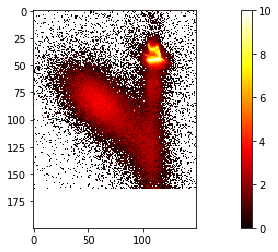

In [64]:
def main():
    #masterFilename = '/Users/charlespan/data/second_79_master.h5'
    hdf5File = h5py.File(masterFilename, 'r')
    #print("Keys: %s" % hdf5File.keys())
    #a_group_key = hdf5File.keys()[0]
    #data = list(hdf5File[a_group_key])
    #print (data)


    ######### NEXUS HEADER ITEMS #########

    ### example: list all entries in /entry/instrument/detector ###
    detector = hdf5File['entry']['instrument']['detector']
    ### example: get the gain settings ###
    #gain_setting = detector['gain_setting']
    #print "gain setting: ", gain_setting[0] ### remark: In NeXus, data is always
                                            ### stored as arrays, even if the data is scalar. 
    




    ######### IMAGES #########

    ### first create the LUT to find the path to the images ###
    
    LUT = createLUT(hdf5File)
    #print (LUT[0])
    ### then read the image imgNr ###
    imgNr = 0
    image = readImage (imgNr, LUT, hdf5File)
    print(image)
    data = numpy.array(image)
    flatdata = data.flatten()
    
    #print(image)
    ### do whatever you want with the image ###
    ### e.g. draw the image ###
    
    if mpl:
        smallimage = image[350:550, 500:650]
        print(smallimage)
        dispImage(smallimage,  max=10, log=True)




if __name__=='__main__':
    main()

In [54]:
import h5py
from h5py import h5z
import numpy as np

print (h5py.version.info)


filters = { 'gzip': h5z.FILTER_DEFLATE,
            'szip': h5z.FILTER_SZIP,
            'shuffle': h5z.FILTER_SHUFFLE,
            'lzf': h5z.FILTER_LZF,
            'so': h5z.FILTER_SCALEOFFSET,
            'f32': h5z.FILTER_FLETCHER32, }
            
print ('encode %d decode %d\n' % (h5z.FILTER_CONFIG_ENCODE_ENABLED,
                               h5z.FILTER_CONFIG_DECODE_ENABLED ))
                               
for name, filter in filters.items():
    print (name)
    print ('    ', h5z.filter_avail(filter))
    if h5z.filter_avail(filter):
        print ('    ', h5z.get_filter_info(filter))
    
with h5py.File('debug.hdf5', 'w') as f:
    dset = f.create_dataset('x', (10,), compression='gzip')
    dset[...] = np.arange(10)
    print (dset[...])

Summary of the h5py configuration
---------------------------------

h5py    2.7.0
HDF5    1.8.18
Python  2.7.13 |Anaconda 4.4.0 (x86_64)| (default, Dec 20 2016, 23:05:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
sys.platform    darwin
sys.maxsize     9223372036854775807
numpy   1.12.1

encode 1 decode 2

shuffle
('    ', True)
('    ', 3)
f32
('    ', True)
('    ', 3)
szip
('    ', True)
('    ', 3)
gzip
('    ', True)
('    ', 3)
so
('    ', True)
('    ', 3)
lzf
('    ', True)
('    ', 3)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


In [55]:
def wavelength(energy): #energy unit: keV
    h = 4.135667662 * 10**(-18) #keV*s Planck constant
    c = 2.99792458 * 10**18 #A speed of light
    return h*c/energy
print(wavelength(11.3001) , wavelength(12.15))

(1.0971955769082515, 1.020446069022299)


In [56]:
def degtoarc (deg):
    """converts degree to arcs
    deg: float
    returns: float
    """
    return deg/180*np.pi

def arctodeg (arc):
    """converts arcs to degree
    arc: float
    returns: float
    """
    return arc*180/np.pi

In [57]:
def PixelsToAngles(x,y,image): # x and y are numpy arrays.
    x_offset = 0.0 # calibrated by STO peak
    y_offset = 0.0 # calibrated by STO peak
    dtheta = (75.0*10**(-6))/(35.0*10**(-2))*180.0/np.pi # angle per pixel
    #print(dtheta)
    return x * dtheta + x_offset, y * dtheta + y_offset
x = []
#for z in range (len(image)):
for number in range (len(image[0])):
    x.append(number)
yeet = np.array(x)
y = []
for number in range (len(image)):
    #for z in range (len(image[0])):
    y.append(number)
leet = np.array(y)

In [69]:
def AnglesToQ(lamda, th, zeta, delta, nu): # angles should be numpy arrays.
    #convert all degrees to arc.
    th_a = degtoarc(th)
    zeta_a = degtoarc(zeta)
    delta_a = degtoarc(delta)
    nu_a = degtoarc(nu)
    Qz = (2 * np.pi / lamda) * (-np.sin(zeta_a)*(np.cos(nu_a)*np.cos(delta_a)-1) + np.cos(zeta_a)*np.sin(nu_a)*np.cos(delta_a)) + th_a * 0.0
    Qx = (2 * np.pi / lamda) * (np.cos(th_a)*np.sin(delta_a)-np.sin(th_a)*((np.cos(zeta_a)*(np.cos(nu_a)*np.cos(delta_a)-1)+np.sin(zeta_a)*np.sin(nu_a)*np.cos(delta_a))))
    Qy = (2 * np.pi / lamda) * (np.sin(th_a)*np.sin(delta_a)+np.cos(th_a)*(np.cos(zeta_a)*(np.cos(nu_a)*np.cos(delta_a)-1)+np.sin(zeta_a)*np.sin(nu_a)*np.cos(delta_a)))
    return Qx, Qz
lamda = wavelength(11.3001)
AnglesToQ(lamda, 70.16, 5.2, 3.0, 4.0)

(0.088111355077348241, 0.39925108465169873)

delta/twotheta


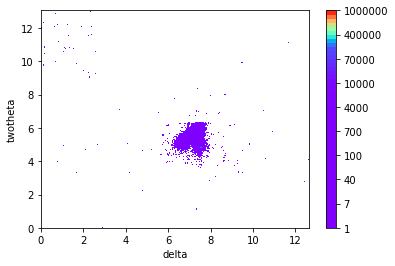

In [79]:
deltaarray, twothetaarray = PixelsToAngles(yeet, leet, readImage (imgNr, LUT, hdf5File))
print("delta/twotheta")
width = 10
levls = np.linspace(1,10,width)
levls = np.concatenate((levls[:-1],np.linspace(10,100,width)))
levls = np.concatenate((levls[:-1],np.linspace(100,1000,width)))
levls = np.concatenate((levls[:-1],np.linspace(1000,10000,width)))
levls = np.concatenate((levls[:-1],np.linspace(10000,100000,width)))
levls = np.concatenate((levls[:-1],np.linspace(100000,1000000,width)))
plt.contourf(deltaarray, twothetaarray, image, cmap=cm.rainbow, levels=levls)
plt.ylabel("twotheta")
plt.xlabel("delta")
plt.colorbar()
plt.show()

Qx/Qz


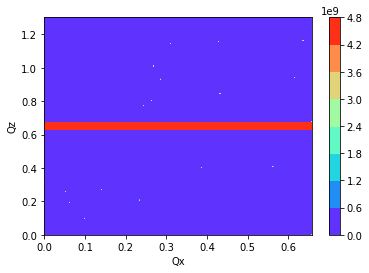

In [68]:
Qxarray = []
Qzarray = []
for num in range (len(deltaarray)):
    Qx = AnglesToQ(lamda, 70.16, 5.2, deltaarray[num], twothetaarray[num])[0]
    Qxarray.append(Qx)
for num in range (len(twothetaarray)):
    Qz = AnglesToQ(lamda, 70.16, 5.2, deltaarray[0], twothetaarray[num])[1]
    Qzarray.append(Qz)
print("Qx/Qz")
plt.contourf(Qxarray, Qzarray, image, cmap = cm.rainbow)
plt.ylabel('Qz')
plt.xlabel('Qx')
plt.colorbar()
plt.show()